In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

In [3]:
data = pd.read_csv('Clean_Data.csv')

In [4]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Random Forest Accuracy: 99.6383
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



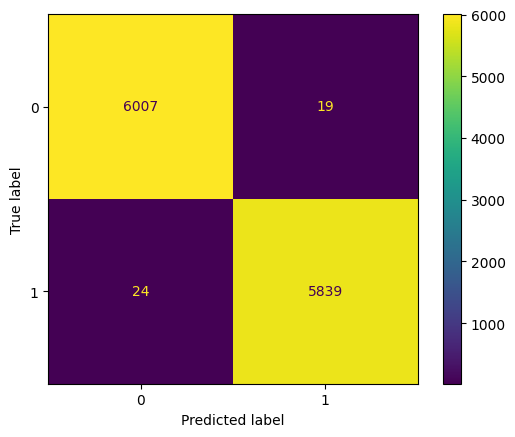

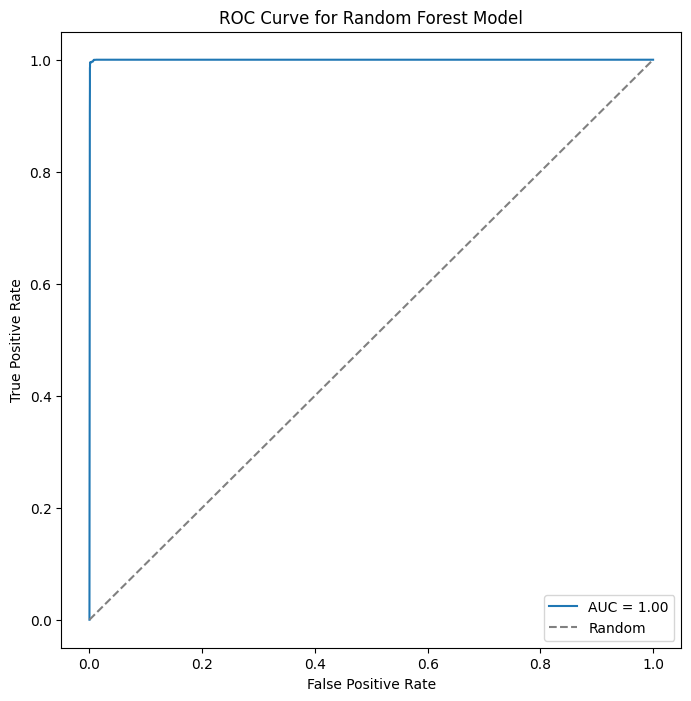

AUC Score for Random forest Model: 0.9996


In [13]:
random_forest_classifier = RandomForestClassifier(random_state=42)


random_forest_classifier.fit(X_train, y_train)


y_pred_rf = random_forest_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)


print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


y_prob_rf = random_forest_classifier.predict_proba(X_test)[:, 1]  


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC Score for Random forest Model: {auc_score_rf:.4f}')